In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
import json
from scipy import stats
import csv
import os.path
import tqdm


In [2]:
finalfile = "algorithmicBiasMediaModelMetrics2.csv"

In [3]:
#create one aggregate file
import os
for filename in os.listdir("aggregate/"):
    if filename.startswith('averages media'):
        if not filename.endswith("new.csv"):
            print(filename)

averages media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000.csv
averages media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000.csv
averages med

In [4]:
#create one aggregate file
import os
aggrfile = open("aggregate/{}".format(finalfile), "w+")
header = "n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster,std_ncluster,avg_pwdist,std_pwdist,avg_niter,std_niter\n"
aggrfile.write(header)
aggrfile.close()
aggrfile = open("aggregate/{}".format(finalfile), "a+")
i = 0
for filename in os.listdir("aggregate/"):
    if filename.startswith('averages media') and filename.endswith("new.csv"):
        infile = open("aggregate/{}".format(filename), "r")
        lines = infile.readlines()
        for line in lines:
            l = line.strip().split(',')
            if l[0] == "complete":
                l = l[1:]
            s = ','.join(l)
            print(s)
            s+='\n'
            aggrfile.write(s)
        infile.close()
        i+=1
aggrfile.close()
print("processed ", i, " files")

100,1.0,0.2,0.0,0.0,0.0,1000000,0.05;0.5;0.95,2.1421060451922322,0.3499388503128019,0.120128702889,0.20851807666094685,45.17,27.806712001299854
100,1.0,0.2,0.5,0.5,0.0,1000000,0.05;0.5;0.95,4.472365249259984,2.2350497745213067,0.133867595366,0.21444744876251684,38.33,27.142740905044654
100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.4388505765499096,2.1248900649528903,0.131987680822,0.21266454102308394,28.49,10.21634163307181
100,1.0,0.2,1.0,1.0,0.0,1000000,0.05;0.5;0.95,3.9785106078233246,1.6875771130457267,0.132391189128,0.21604554644084692,31.42,12.543403433557003
100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.188130107265675,1.6374703874071392,0.135711719996,0.2161297340106796,39.42,16.18090906537139
100,1.0,0.2,1.5,1.5,0.0,1000000,0.05;0.5;0.95,4.3015544170405775,1.9159948467457486,0.135008910982,0.21702565437133403,47.33,20.55151448129182
100,1.0,0.3,0.0,0.0,0.0,1000000,0.05;0.5;0.95,1.4169300117395813,0.426495405544276,0.053520418891,0.149272351935487,35.81,34.899189594365


100,1.0,0.5,1.25,1.25,0.5,1000000,0.5,1.0,0.0,0.0002308555999999984,0.00038140303802790504,14.87,1.1516786167866617
100,1.0,0.5,1.5,1.5,0.5,1000000,0.5,1.0,0.0,0.000238710099999997,0.00039788075659308216,15.4,0.9949366763261824
processed  576  files


In [6]:
# results = pd.read_csv("aggregate/{}".format(filename))
# results.drop_duplicates(subset = ['graph', 'n', 'p', 'eps', 'gam', 'gr', 'pr', 'max_it'], inplace=True)
# results.to_csv("aggregate/{}".format(filename))
results = pd.read_csv("aggregate/{}".format(finalfile))
results = results.drop(columns=['avg_ncluster', 'std_ncluster', 'avg_pwdist', 'std_pwdist', 'avg_niter', 'std_niter'])
results.head()


,n,p,eps,gam,gam_media,p_media,max_it,media_op
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95


In [7]:
results.columns

Index(['n', 'p', 'eps', 'gam', 'gam_media', 'p_media', 'max_it', 'media_op'], dtype='object')

In [3]:
# def nclusters_meanshift(data, bw):
#     ops = {i: data[i] for i in range(len(data))}
#     sorted_ops = sorted(ops.items(), key = lambda kv:(kv[1], kv[0]))
#     A=np.array([el[1] for el in sorted_ops]).reshape(-1,1)
#     clustering = MeanShift(bandwidth=bw).fit(A)
#     lbls = clustering.labels_
#     labels = np.arange(len(sorted_ops))
#     for i in range(len(labels)):
#         cl = lbls[i]
#         labels[sorted_ops[i][0]]=cl
#     cluster_participation_dict = {}
#     for l in labels:
#         if l not in cluster_participation_dict:
#             cluster_participation_dict[l] = 1
#         else:
#             cluster_participation_dict[l] += 1
#     #computing effective number of clusters using function explained in the paper
#     C_num = 0
#     C_den = 0
#     for k in cluster_participation_dict:
#         C_num += cluster_participation_dict[k]
#         C_den += ((cluster_participation_dict[k])**2)
#     C_num = (C_num**2)
#     C = C_num/C_den
#     return C

def nclusters(data, threshold):
    data = [float(el) for el in data]
    data = sorted(data)
    start = data[0]
    max_val = start + threshold
    c = (start, max_val)
    cluster = dict()
    for i in data:
        if i <= max_val:
            if c in cluster.keys():
                cluster[c] += 1
            else:
                cluster[c] = 1
        else:
            max_val = i + threshold
            c = (i, max_val)
            cluster[c] = 1
    #ora ho il dizionario con i cluster di una run
    C_num = len(data)**2
    C_den = 0
    for k in cluster.keys():
        C_den += cluster[k]*cluster[k]
    C = C_num / C_den
    return C

def pwdist(opinions):
    pwdarray = np.zeros(shape=(100, 100))
    for i in range(100):
        o_i = opinions[i]
        for j in range(100):
            if j != i:
                o_j = opinions[j]
                d = abs(o_i-o_j)
                pwdarray[i, j] = d
    return pwdarray

In [11]:
results.head()

,n,p,eps,gam,gam_media,p_media,max_it,media_op
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95


In [12]:
import tqdm
metric_name = 'ncluster_0.01'
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            nc = nclusters(finalops, 0.01)
            array.append(nc)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing

doing media mo[0.0] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.0]

doing media mo[0.5] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.1 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.1 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.1 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.1 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.1 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.1 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.1 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.1 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.1 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.1 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.1 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.1 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.1 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.1 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.1 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.2 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.2 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5]

In [43]:
import tqdm
metric_name = 'niter'
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_iterations {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            nit = data[nr]
            array.append(nit)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.95] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g1.25 gm1.25 mi1000000
do

doing media mo[0.0] p0.3 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.3 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.3 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.3 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.3 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.3 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.3 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.3 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.3 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.3 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.3 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.3 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.3 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.3 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.3 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.3 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.3 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.3 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.3 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.

doing media mo[0.5] p0.5 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.5 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.5 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.5 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.5 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.5 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.5 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.5 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.5 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.5 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.5 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.5 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.5 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.5 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.5 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.5 e0.5 g1.5 gm1.5 mi1000000


In [45]:
import tqdm
metric_name = 'pwdist'
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            array.append(pwdist(finalops))
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.5, 0.95] p0.5 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.0 gm0

doing media mo[0.05, 0.95] p0.5 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.5 e0.5 g0.75 gm0.75 mi1000000
do

doing media mo[0.0] p0.5 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.5 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.5 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.5 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.5 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.5 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.5 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.5 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.

In [46]:
import tqdm
metric_name = 'iqm_pwdist'
avg = []
std = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    # print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            nc = pwdist(finalops)
            array.append(nc)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
        array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        if len(array) == 0:
            print(array)
            print('array = ', array)
            print(Q1)
            print(Q3)
            print(f"{name}")
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break
print(len(avg))
results[metric_name] = avg
results["std_"+metric_name] = std

576


In [47]:
results

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,med_niter,Q1_niter,Q3_niter,avg_pwdist,std_pwdist,med_pwdist,Q1_pwdist,Q3_pwdist,iqm_pwdist,std_iqm_pwdist
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,34.0,30.5,46.5,0.240257,0.241035,0.29670,0.0000,0.468300,0.141211,0.190860
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,30.0,24.0,43.0,0.267735,0.236927,0.28850,0.0026,0.459000,0.244232,0.149788
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,26.0,22.5,31.0,0.263975,0.235819,0.27220,0.0029,0.460300,0.235807,0.149161
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,28.0,24.0,36.5,0.264782,0.241446,0.26926,0.0030,0.469300,0.231505,0.152610
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,35.0,26.5,49.5,0.271423,0.237884,0.27800,0.0047,0.466800,0.246906,0.147068
5,100,1.0,0.2,1.50,1.50,0.0,1000000,0.05;0.5;0.95,4.301554,1.906391,...,41.0,32.5,57.0,0.270018,0.240303,0.27550,0.0045,0.467300,0.242939,0.151086
6,100,1.0,0.3,0.00,0.00,0.0,1000000,0.05;0.5;0.95,1.416930,0.424358,...,24.5,20.0,32.0,0.107041,0.197067,0.00030,0.0000,0.001000,0.000231,0.000312
7,100,1.0,0.3,0.50,0.50,0.0,1000000,0.05;0.5;0.95,1.904386,0.981943,...,25.0,20.0,36.5,0.134928,0.208474,0.00190,0.0007,0.383300,0.031962,0.087905
8,100,1.0,0.3,0.75,0.75,0.0,1000000,0.05;0.5;0.95,1.890843,1.017203,...,29.0,22.0,42.5,0.128979,0.208682,0.00240,0.0010,0.357900,0.017955,0.054582
9,100,1.0,0.3,1.00,1.00,0.0,1000000,0.05;0.5;0.95,1.710322,0.958429,...,45.5,33.0,59.5,0.106108,0.193368,0.00290,0.0010,0.043300,0.003752,0.004699


In [48]:
import tqdm
metric_name = 'iqm_niter'
avg = []
std = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    # print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_iterations {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            nit = data[nr]
            array.append(nit)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
        array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        if len(array) == 0:
            print(array)
            print('array = ', array)
            print(Q1)
            print(Q3)
            print(f"{name}")
    except FileNotFoundError:
        print(f"aggregate/final_iterations {name}.json file not found")
        break
print(len(avg))
results[metric_name] = avg
results["std_"+metric_name] = std

576


In [49]:
results.to_csv(f"aggregate/{finalfile}")
results = pd.read_csv(f"aggregate/{finalfile}", index_col=[0])

In [50]:
results.head()

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,Q3_niter,avg_pwdist,std_pwdist,med_pwdist,Q1_pwdist,Q3_pwdist,iqm_pwdist,std_iqm_pwdist,iqm_niter,std_iqm_niter
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,46.5,0.240257,0.241035,0.29670,0.0000,0.4683,0.141211,0.190860,35.420000,4.064923
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,43.0,0.267735,0.236927,0.28850,0.0026,0.4590,0.244232,0.149788,30.872727,5.954539
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,31.0,0.263975,0.235819,0.27220,0.0029,0.4603,0.235807,0.149161,26.730769,2.646590
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,36.5,0.264782,0.241446,0.26926,0.0030,0.4693,0.231505,0.152610,27.735849,3.115094
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,49.5,0.271423,0.237884,0.27800,0.0047,0.4668,0.246906,0.147068,35.460000,5.872683


In [4]:
def entropy(opinions, n, nbins):
    bincounts, bin_edges = np.histogram(opinions, bins = np.linspace(0, 1, nbins))
    probabilities = bincounts/n
    entr = stats.entropy(probabilities)
    return entr

def nodeperc_withininterval(opinions, center, width):
    sortedops = sorted(opinions)
    sortedopsarr = np.array(sortedops)
    withinrange = np.where(np.logical_and(sortedopsarr>=(center-width), sortedopsarr<=(center+width)))
    withinrange = withinrange[0]
    perc = len(withinrange) / len(sortedops)
    return perc

def average_opinions(opinions):
    a = np.array(opinions)
    return np.average(a)

def std_opinions(opinions):
    a = np.array(opinions)
    return np.std(a)

def median_opinions(opinions):
    a = np.array(opinions)
    return np.median(a)

In [20]:
metric_name = 'avg_opinion'
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            val = average_opinions(finalops)
            array.append(val)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.95] p0.0 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.0 gm0.0 mi1000000
do

doing media mo[0.0] p0.1 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0]

doing media mo[0.5] p0.2 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.2 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.2 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.2 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.2 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.2 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.2 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.2 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.2 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.2 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.2 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.2 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.5]

In [21]:
metric_name = 'median_opinion'
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            val = median_opinions(finalops)
            array.append(val)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.5, 0.95] p0.5 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.75 gm0.75 mi10000

doing media mo[0.0] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0]

doing media mo[0.5] p0.2 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.2 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.2 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.2 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.2 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.2 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.2 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.2 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.2 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.2 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.2 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.2 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.2 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.2 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.2 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.2 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.2 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.2 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.2 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.5]

In [22]:
metric_name = 'std_opinions'
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            val = std_opinions(finalops)
            array.append(val)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
do

doing media mo[0.0] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.1 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.1 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.1 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.1 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.1 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.1 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.1 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.

doing media mo[0.5] p0.2 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.2 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.2 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.2 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.2 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.2 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5]

In [27]:
metric_name = '095_perc'
center = 0.95
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            val = nodeperc_withininterval(finalops, center, 0.01)
            array.append(val)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.95] p0.0 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.25 gm1.25 mi1000000
do

doing media mo[0.0] p0.1 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.

doing media mo[0.5] p0.3 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.4 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.4 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5]

In [28]:
metric_name = '00_perc'
center = 0.0
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            val = nodeperc_withininterval(finalops, center, 0.01)
            array.append(val)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.5 g0.5 gm0.5 mi1000000
doin

doing media mo[0.0] p0.1 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.2 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0]

doing media mo[0.5] p0.3 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.4 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.4 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.4 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.4 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.5]

In [29]:
metric_name = '05_perc'
center = 0.5
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            val = nodeperc_withininterval(finalops, center, 0.01)
            array.append(val)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g1.25 gm1.25 mi1000000
do

doing media mo[0.0] p0.1 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.1 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.1 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.1 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.1 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.1 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.1 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.

doing media mo[0.5] p0.2 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5]

In [30]:
metric_name = '005_perc'
center = 0.05
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            val = nodeperc_withininterval(finalops, center, 0.01)
            array.append(val)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.5, 0.95] p0.5 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] 

doing media mo[0.05, 0.95] p0.5 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.5 gm1.5 mi1000000
doing media 

doing media mo[0.5] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.1 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.1 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.1 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.1 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.1 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.1 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.1 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.1 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.1 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.1 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5]

In [31]:
metric_name = '095_perc'
center = 0.95
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            val = nodeperc_withininterval(finalops, center, 0.01)
            array.append(val)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.95] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.1 e0.5 g0.5 gm0.5 mi1000000
doin

doing media mo[0.0] p0.2 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.2 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.2 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.2 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.2 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.2 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.2 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.2 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.2 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0]

doing media mo[0.5] p0.3 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.3 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.3 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.3 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.3 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.3 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.3 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.4 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.4 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.4 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.4 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.4 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.4 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.5]

In [32]:
results.head()

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,avg_05_perc,std_05_perc,med_05_perc,Q1_05_perc,Q3_05_perc,avg_005_perc,std_005_perc,med_005_perc,Q1_005_perc,Q3_005_perc
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,0.0173,0.076353,0.0,0.0,0.00,0.0010,0.005385,0.0,0.0,0.000
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,0.0183,0.045979,0.0,0.0,0.02,0.0040,0.011045,0.0,0.0,0.000
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,0.0210,0.071084,0.0,0.0,0.02,0.0052,0.013151,0.0,0.0,0.000
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,0.0088,0.017679,0.0,0.0,0.00,0.0089,0.016242,0.0,0.0,0.015
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,0.0193,0.077114,0.0,0.0,0.02,0.0086,0.017608,0.0,0.0,0.010


In [33]:
results.to_csv(f"aggregate/{finalfile}")
results = pd.read_csv(f"aggregate/{finalfile}", index_col=[0])

In [34]:
max_entr_array = np.arange(0, 1, 0.01)
maxval = entropy(max_entr_array, 100, 101)

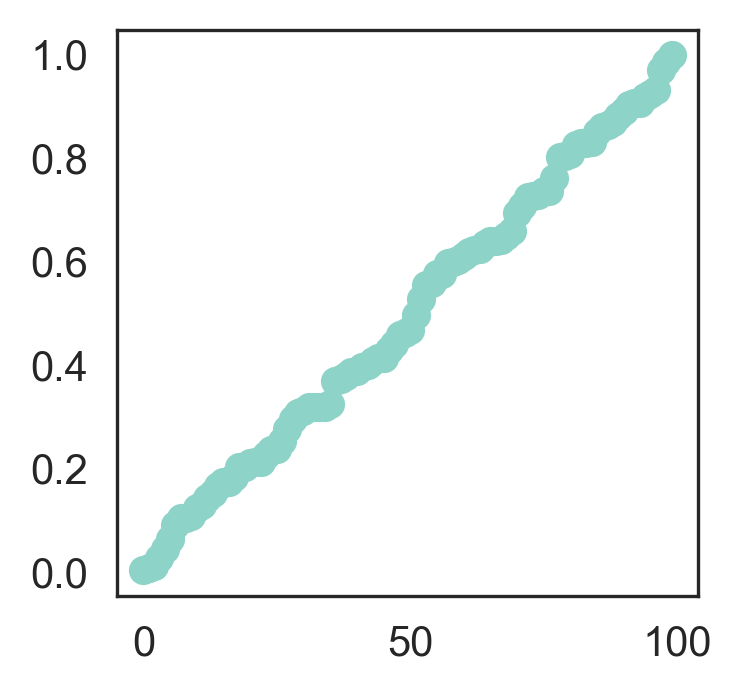

In [35]:
metric_name = '100B_norm_entr'
avg = []
std = []
med = []
Q1s = []
Q3s = []
for index, row in results.iterrows():
    eps = row['eps']
    gam = row['gam']
    p_media = row['p_media']
    max_it = row['max_it']
    mo = ", ".join(row['media_op'].split(";"))
    name = f'media mo[{mo}] p{p_media} e{eps} g{gam} gm{gam} mi{max_it}'
    print(f'doing {name}')
    try:
        jsonfile = open(f'aggregate/final_opinions {name}.json')
        data = json.load(jsonfile)
        array = []
        for nr in data.keys():
            finalops = list(data[nr])
            val = entropy(finalops, 100, 101)
            val = val/maxval
            array.append(val)
        array = np.array(array)
        Q1 = np.percentile(array, 25, interpolation = 'midpoint')
        Q3 = np.percentile(array, 75, interpolation = 'midpoint')
#         array = array[(array <= Q3) & (array >= Q1)]
        avg.append(np.average(array))
        std.append(np.std(array))
        med.append(np.median(array))
        Q1s.append(Q1)
        Q3s.append(Q3)
    except FileNotFoundError:
        print(f"aggregate/final_opinions {name}.json file not found")
        break

results['avg_'+metric_name] = avg
results['std_'+metric_name] = std
results['med_'+metric_name] = med
results['Q1_'+metric_name] = Q1s
results['Q3_'+metric_name] = Q3s

doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.5, 0.95] p0.0 e0.4 g1.

doing media mo[0.05, 0.5, 0.95] p0.5 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.05, 0.95] p0.0 e0.4 g1.0 gm1.0 mi1000000

doing media mo[0.0] p0.0 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.0 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.0 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.0 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.0 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.0 e0.5 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.0 e0.5 g1.5 gm1.5 mi1000000
doing media mo[0.0] p0.1 e0.2 g0.0 gm0.0 mi1000000
doing media mo[0.0] p0.1 e0.2 g0.5 gm0.5 mi1000000
doing media mo[0.0] p0.1 e0.2 g0.75 gm0.75 mi1000000
doing media mo[0.0] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.0] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.0] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.0]

doing media mo[0.5] p0.1 e0.2 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.1 e0.2 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.1 e0.2 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.1 e0.3 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.1 e0.3 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.1 e0.3 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.1 e0.3 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.1 e0.3 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.1 e0.3 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.1 e0.4 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.1 e0.4 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.1 e0.4 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.1 e0.4 g1.0 gm1.0 mi1000000
doing media mo[0.5] p0.1 e0.4 g1.25 gm1.25 mi1000000
doing media mo[0.5] p0.1 e0.4 g1.5 gm1.5 mi1000000
doing media mo[0.5] p0.1 e0.5 g0.0 gm0.0 mi1000000
doing media mo[0.5] p0.1 e0.5 g0.5 gm0.5 mi1000000
doing media mo[0.5] p0.1 e0.5 g0.75 gm0.75 mi1000000
doing media mo[0.5] p0.1 e0.5 g1.0 gm1.0 mi1000000
doing media mo[0.5]

In [36]:
results.head()

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,avg_005_perc,std_005_perc,med_005_perc,Q1_005_perc,Q3_005_perc,avg_100B_norm_entr,std_100B_norm_entr,med_100B_norm_entr,Q1_100B_norm_entr,Q3_100B_norm_entr
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,0.0010,0.005385,0.0,0.0,0.000,0.180683,0.033482,0.170561,0.150493,0.209472
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,0.0040,0.011045,0.0,0.0,0.000,0.473159,0.090315,0.475069,0.419875,0.536287
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,0.0052,0.013151,0.0,0.0,0.000,0.467061,0.107699,0.479024,0.420500,0.540764
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,0.0089,0.016242,0.0,0.0,0.015,0.461184,0.094486,0.478211,0.412954,0.527695
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,0.0086,0.017608,0.0,0.0,0.010,0.482033,0.081013,0.487318,0.441163,0.541239


In [37]:
results.to_csv(f"aggregate/{finalfile}")
results = pd.read_csv(f"aggregate/{finalfile}", index_col=[0])
results.head()

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,avg_005_perc,std_005_perc,med_005_perc,Q1_005_perc,Q3_005_perc,avg_100B_norm_entr,std_100B_norm_entr,med_100B_norm_entr,Q1_100B_norm_entr,Q3_100B_norm_entr
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,0.0010,0.005385,0.0,0.0,0.000,0.180683,0.033482,0.170561,0.150493,0.209472
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,0.0040,0.011045,0.0,0.0,0.000,0.473159,0.090315,0.475069,0.419875,0.536287
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,0.0052,0.013151,0.0,0.0,0.000,0.467061,0.107699,0.479024,0.420500,0.540764
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,0.0089,0.016242,0.0,0.0,0.015,0.461184,0.094486,0.478211,0.412954,0.527695
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,0.0086,0.017608,0.0,0.0,0.010,0.482033,0.081013,0.487318,0.441163,0.541239


In [51]:
results.to_csv(f"aggregate/{finalfile}")
results = pd.read_csv(f"aggregate/{finalfile}", index_col=[0])
results.head()

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,Q3_niter,avg_pwdist,std_pwdist,med_pwdist,Q1_pwdist,Q3_pwdist,iqm_pwdist,std_iqm_pwdist,iqm_niter,std_iqm_niter
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,46.5,0.240257,0.241035,0.29670,0.0000,0.4683,0.141211,0.190860,35.420000,4.064923
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,43.0,0.267735,0.236927,0.28850,0.0026,0.4590,0.244232,0.149788,30.872727,5.954539
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,31.0,0.263975,0.235819,0.27220,0.0029,0.4603,0.235807,0.149161,26.730769,2.646590
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,36.5,0.264782,0.241446,0.26926,0.0030,0.4693,0.231505,0.152610,27.735849,3.115094
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,49.5,0.271423,0.237884,0.27800,0.0047,0.4668,0.246906,0.147068,35.460000,5.872683


In [52]:
results

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,Q3_niter,avg_pwdist,std_pwdist,med_pwdist,Q1_pwdist,Q3_pwdist,iqm_pwdist,std_iqm_pwdist,iqm_niter,std_iqm_niter
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,46.5,0.240257,0.241035,0.29670,0.0000,0.468300,0.141211,0.190860,35.420000,4.064923
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,43.0,0.267735,0.236927,0.28850,0.0026,0.459000,0.244232,0.149788,30.872727,5.954539
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,31.0,0.263975,0.235819,0.27220,0.0029,0.460300,0.235807,0.149161,26.730769,2.646590
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,36.5,0.264782,0.241446,0.26926,0.0030,0.469300,0.231505,0.152610,27.735849,3.115094
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,49.5,0.271423,0.237884,0.27800,0.0047,0.466800,0.246906,0.147068,35.460000,5.872683
5,100,1.0,0.2,1.50,1.50,0.0,1000000,0.05;0.5;0.95,4.301554,1.906391,...,57.0,0.270018,0.240303,0.27550,0.0045,0.467300,0.242939,0.151086,42.764706,7.389946
6,100,1.0,0.3,0.00,0.00,0.0,1000000,0.05;0.5;0.95,1.416930,0.424358,...,32.0,0.107041,0.197067,0.00030,0.0000,0.001000,0.000231,0.000312,25.094340,3.546266
7,100,1.0,0.3,0.50,0.50,0.0,1000000,0.05;0.5;0.95,1.904386,0.981943,...,36.5,0.134928,0.208474,0.00190,0.0007,0.383300,0.031962,0.087905,24.934426,4.482640
8,100,1.0,0.3,0.75,0.75,0.0,1000000,0.05;0.5;0.95,1.890843,1.017203,...,42.5,0.128979,0.208682,0.00240,0.0010,0.357900,0.017955,0.054582,29.018868,5.523502
9,100,1.0,0.3,1.00,1.00,0.0,1000000,0.05;0.5;0.95,1.710322,0.958429,...,59.5,0.106108,0.193368,0.00290,0.0010,0.043300,0.003752,0.004699,44.584906,8.612045


In [53]:
results = results[results['gam'] != 0.25]

In [54]:
results.to_csv(f"aggregate/{finalfile}")
results = pd.read_csv(f"aggregate/{finalfile}", index_col=[0])
results.head()

,n,p,eps,gam,gam_media,p_media,max_it,media_op,avg_ncluster_0.01,std_ncluster_0.01,...,Q3_niter,avg_pwdist,std_pwdist,med_pwdist,Q1_pwdist,Q3_pwdist,iqm_pwdist,std_iqm_pwdist,iqm_niter,std_iqm_niter
0,100,1.0,0.2,0.00,0.00,0.0,1000000,0.05;0.5;0.95,2.142106,0.348185,...,46.5,0.240257,0.241035,0.29670,0.0000,0.4683,0.141211,0.190860,35.420000,4.064923
1,100,1.0,0.2,0.50,0.50,0.0,1000000,0.05;0.5;0.95,4.467653,2.214858,...,43.0,0.267735,0.236927,0.28850,0.0026,0.4590,0.244232,0.149788,30.872727,5.954539
2,100,1.0,0.2,0.75,0.75,0.0,1000000,0.05;0.5;0.95,4.440457,2.114218,...,31.0,0.263975,0.235819,0.27220,0.0029,0.4603,0.235807,0.149161,26.730769,2.646590
3,100,1.0,0.2,1.00,1.00,0.0,1000000,0.05;0.5;0.95,3.974855,1.673121,...,36.5,0.264782,0.241446,0.26926,0.0030,0.4693,0.231505,0.152610,27.735849,3.115094
4,100,1.0,0.2,1.25,1.25,0.0,1000000,0.05;0.5;0.95,4.187479,1.626057,...,49.5,0.271423,0.237884,0.27800,0.0047,0.4668,0.246906,0.147068,35.460000,5.872683
